In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels 
#import datetime for dates and time realted calculations
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
register_matplotlib_converters()
from time import time

In [4]:
daily = pd.read_csv('D:\salesdaily.csv')
weekly = pd.read_csv('D:\salesweekly.csv')
monthly = pd.read_csv('D:\salesmonthly.csv')

In [5]:
def print_shape(data):
    print('Rows : ',data.shape[0])
    print('Columns : ',data.shape[1])


In [8]:
#sixe of daily
print_shape(daily)
#size of weekly
print_shape(weekly)
#size of monthly
print_shape(monthly)

Rows :  2106
Columns :  13
Rows :  302
Columns :  9
Rows :  70
Columns :  9


In [9]:
monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [10]:
weekly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [11]:
daily.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [13]:
monthly.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [14]:
daily.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
1751,10/19/2018,4.00,2.066,0.0,10.6,5.0,2.0,6.0,4.0,2018,10,276,Friday
1274,6/29/2017,4.00,3.670,6.0,17.0,1.0,0.0,21.0,5.0,2017,6,276,Thursday
359,12/27/2014,7.33,5.340,4.4,39.0,26.0,0.0,9.0,3.0,2014,12,276,Saturday


In [15]:
weekly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
210,1/14/2018,34.48,30.345,28.1,255.525,52.0,6.0,44.00,6.00
214,2/11/2018,42.18,28.725,31.6,366.950,76.0,0.0,71.25,6.66
295,9/1/2019,30.36,16.842,25.0,117.400,45.2,4.0,15.00,27.10


In [16]:
monthly.sample(3)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
46,2017-11-30,163.85,119.780,104.45,867.899,192.0,15.0,196.0,46.6
45,2017-10-31,137.64,88.737,100.40,1184.350,226.0,15.0,247.0,51.0
32,2016-09-30,172.96,126.218,116.70,1118.699,307.0,18.0,121.0,69.3


In [17]:
#converting datatype of dates from object to Datetime
monthly['datum'] = pd.to_datetime(monthly['datum'], format= '%Y-%m-%d')
weekly['datum'] = pd.to_datetime(weekly['datum'], format= '%m/%d/%Y')
daily['datum'] = pd.to_datetime(daily['datum'], format= '%m/%d/%Y')

In [18]:
#extracting year from dates
monthly['year'] = monthly['datum'].dt.year
monthly['month'] = monthly['datum'].dt.month
monthly['day'] = monthly['datum'].dt.day

In [19]:
# setting date as index of dataframe, basic condition for anlysing time series data
monthly.set_index(monthly['datum'], inplace= True)

In [20]:
monthly.sample(2)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2018-07-31,2018-07-31,150.18,132.549,87.20,679.350,283.0,19.0,90.0,122.2,2018,7,31
2018-10-31,2018-10-31,144.71,129.400,76.05,1129.275,287.0,25.0,353.0,76.9,2018,10,31


In [21]:
monthly.tail(4)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,
2019-07-31,2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20,2019,7,31
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31


In [22]:
monthly.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'year', 'month', 'day'],
      dtype='object')

In [23]:
num_col_list=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']

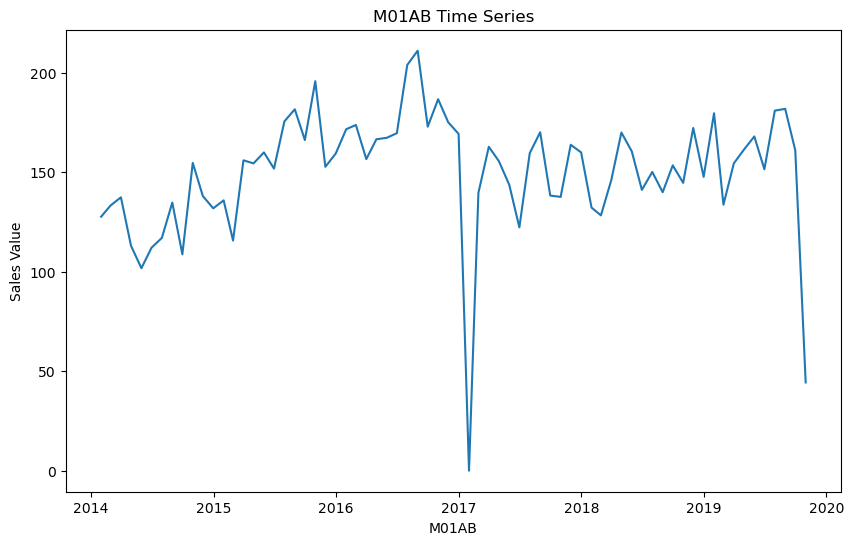

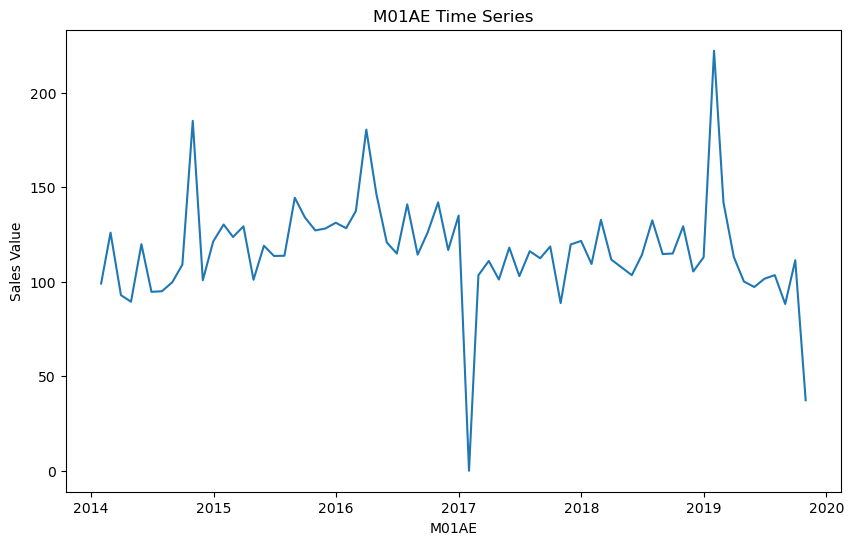

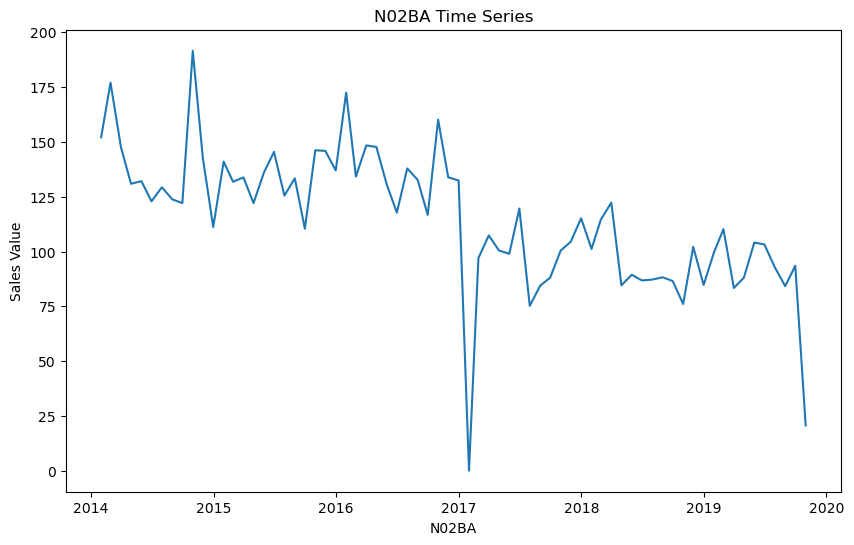

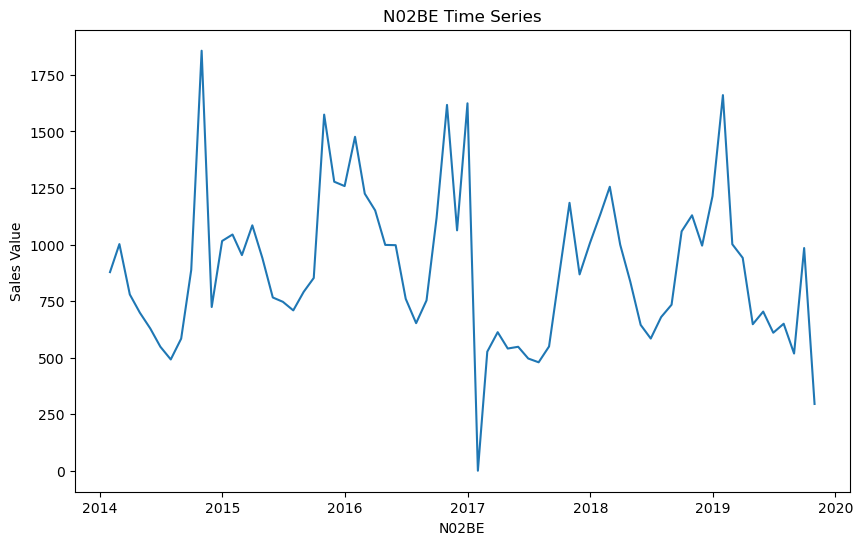

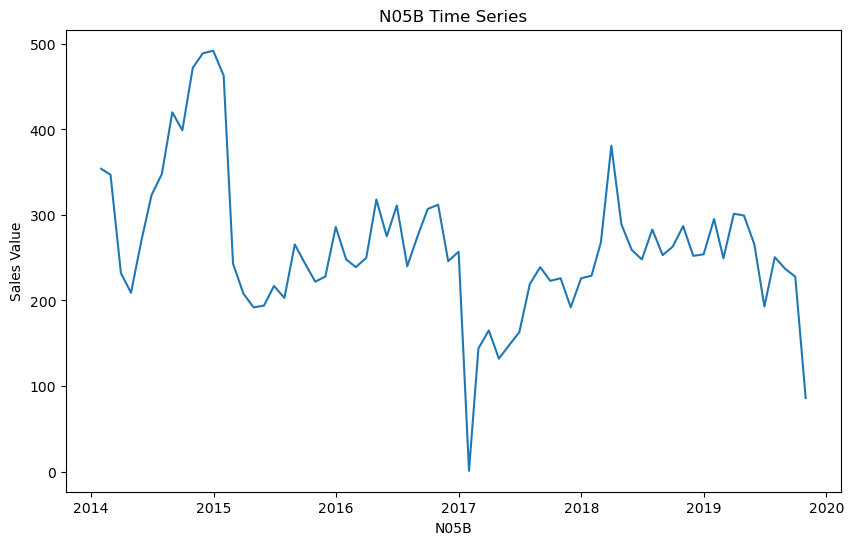

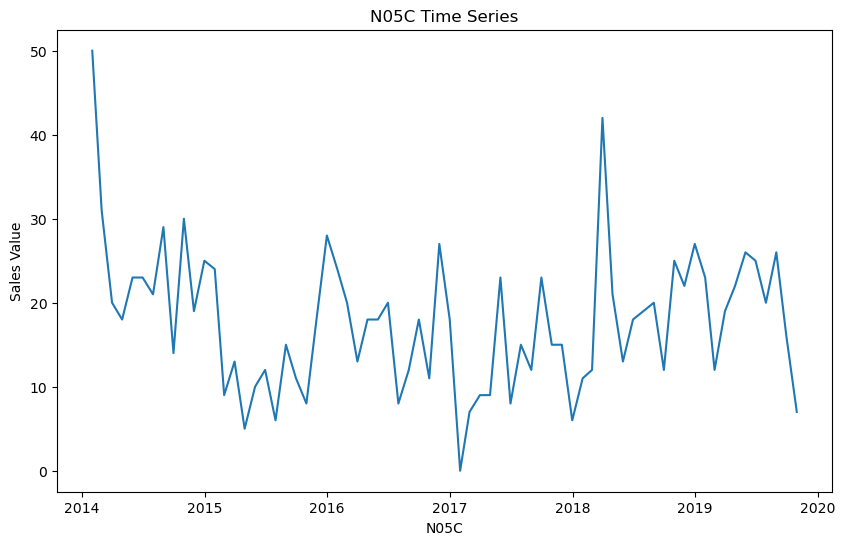

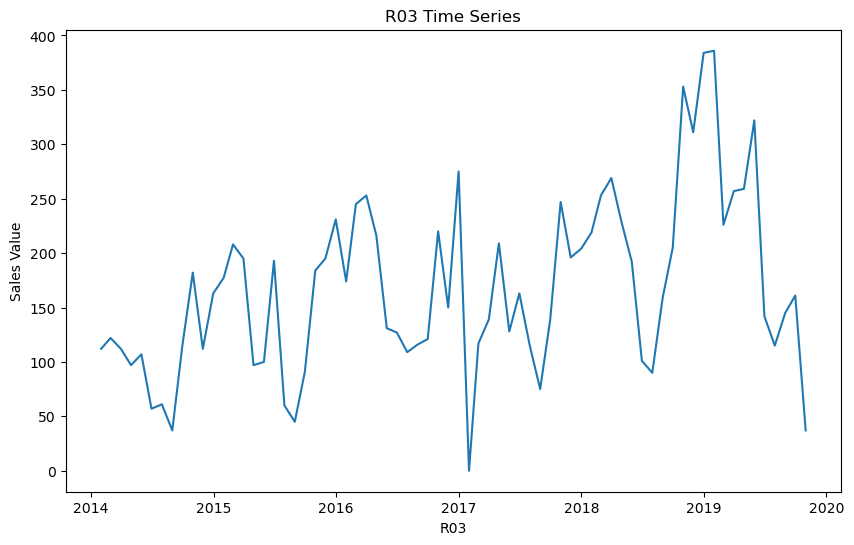

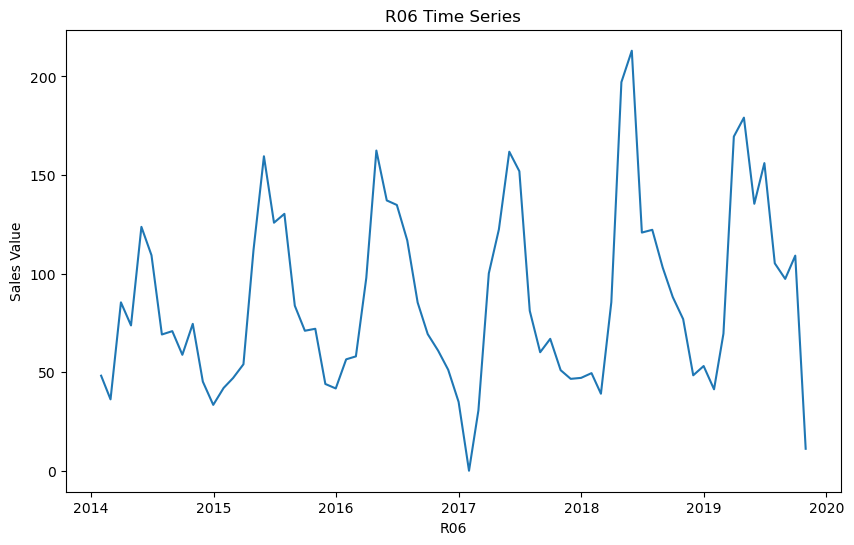

In [24]:
# Plot the time series of each column
for column in num_col_list:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly.index, monthly[column])
    plt.title(f'{column} Time Series')
    plt.xlabel(column)
    plt.ylabel('Sales Value')
    plt.show()

In [25]:
monthly['total_sales'] = monthly['M01AB']
for cols in monthly.columns[2:9]:
    monthly['total_sales'] = monthly['total_sales']+monthly[cols]

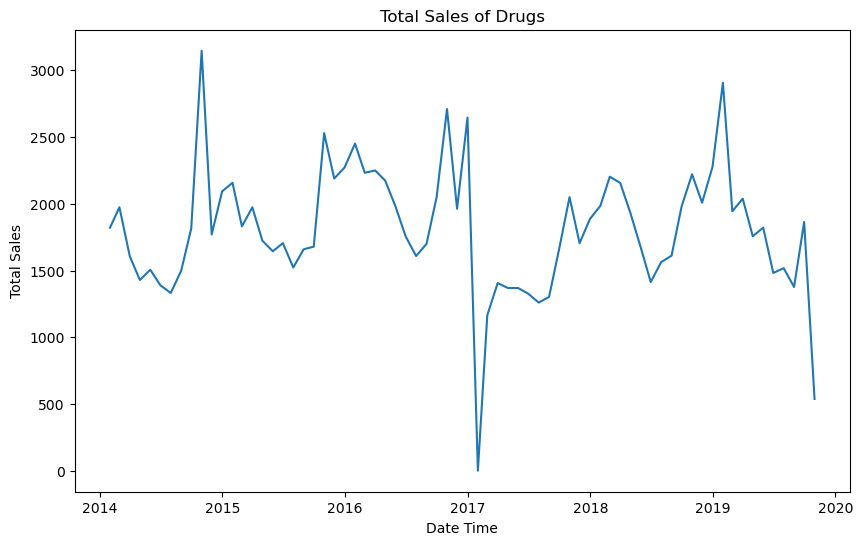

In [26]:
# plotting the total sales data 
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'])
plt.xlabel('Date Time')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

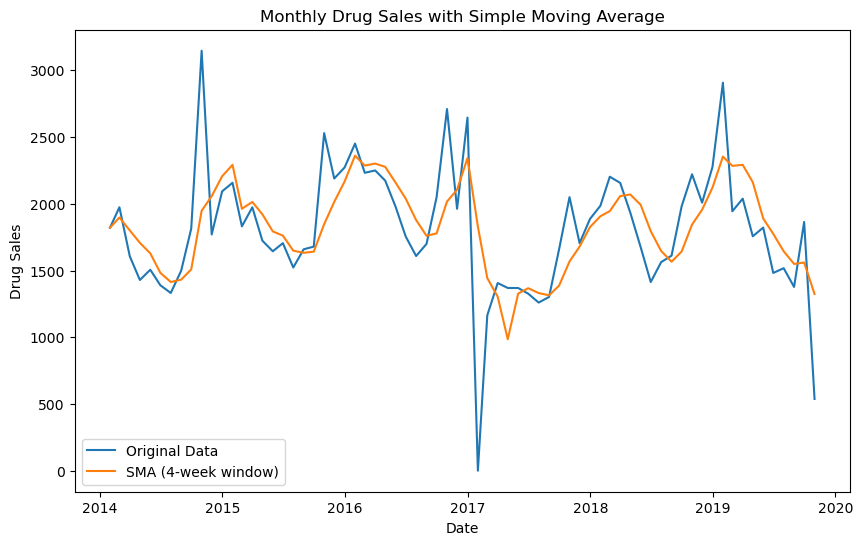

In [27]:
# Calculate a simple moving average with window size 4 (adjust as needed)
window_size = 4
monthly['SMA'] = monthly['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'], label='Original Data')
plt.plot(monthly.index, monthly['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()

In [28]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [29]:
perform_adf_test(monthly["total_sales"])

ADF Statistic: -3.378637
p-value: 0.011709


In [30]:
perform_adf_test(monthly["SMA"])

ADF Statistic: -1.968782
p-value: 0.300427


In [31]:
#infer the frequency of the data
monthly = monthly.asfreq(pd.infer_freq(monthly.index))

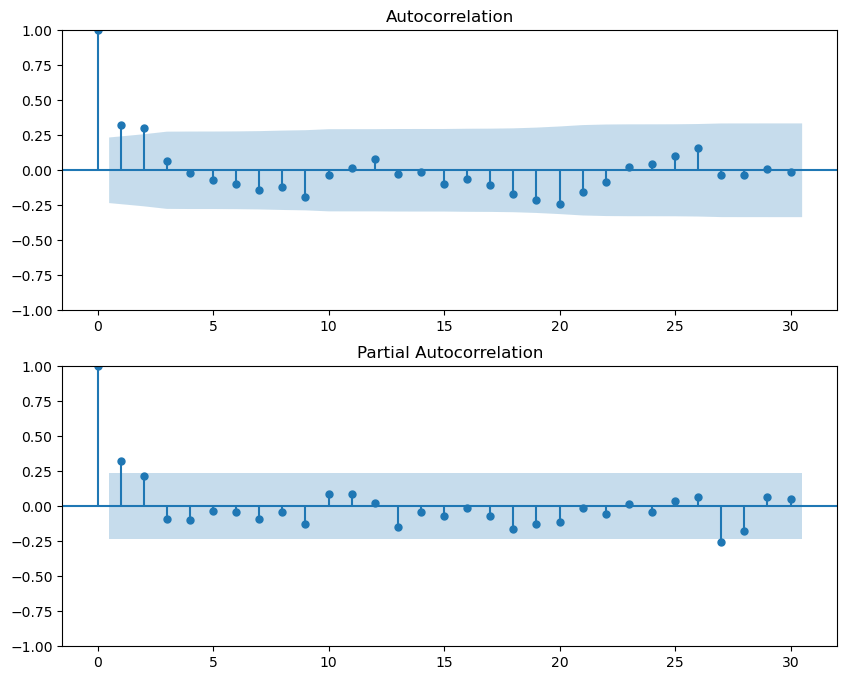

In [32]:
# Plot ACF and PACF of the differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(monthly['total_sales'], lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly['total_sales'], lags=30, ax=ax2)
plt.show()

In [33]:
train_end = dt.datetime(2019,7,31)
# test_end = datetime(2004,1,1) till end

train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

In [34]:
# You can adjust these values based on ACF and PACF analysis
model = statsmodels.tsa.ar_model.AutoReg(train_data["total_sales"], lags=1)
results = model.fit()

In [35]:
# Print model summary
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   67
Model:                     AutoReg(1)   Log Likelihood                -494.001
Method:               Conditional MLE   S.D. of innovations            430.924
Date:                Wed, 15 May 2024   AIC                            994.003
Time:                        17:17:47   BIC                           1000.572
Sample:                    02-28-2014   HQIC                           996.599
                         - 07-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1170.2422    218.386      5.359      0.000     742.213    1598.272
total_sales.L1     0.3607      0.115      3.129      0.002       0.135       0.587
                                    

In [36]:
test_data

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day,total_sales,SMA
datum,,,,,,,,,,,,,,
2019-08-31,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30,2019,8,31,1377.779,1550.07175
2019-09-30,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10,2019,9,30,1864.387,1560.62850
2019-10-31,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13,2019,10,31,538.600,1324.67675


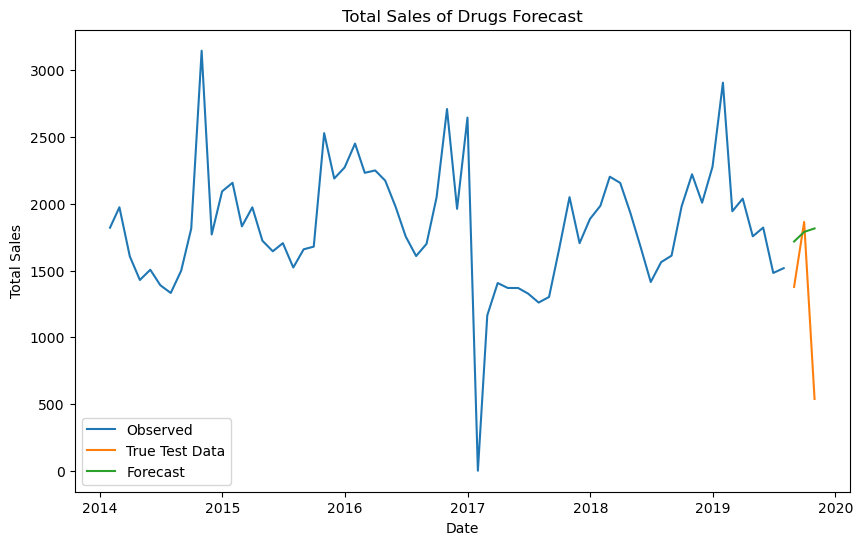

In [37]:
# Forecast the next 10 time steps
forecast = results.forecast(steps=3)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['total_sales'], label='Observed')
plt.plot(test_data.index, test_data['total_sales'], label='True Test Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales of Drugs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [38]:
forecast

2019-08-31    1717.759368
2019-09-30    1789.833301
2019-10-31    1815.830170
Freq: M, dtype: float64

In [39]:
residuals = test_data['total_sales'] - forecast

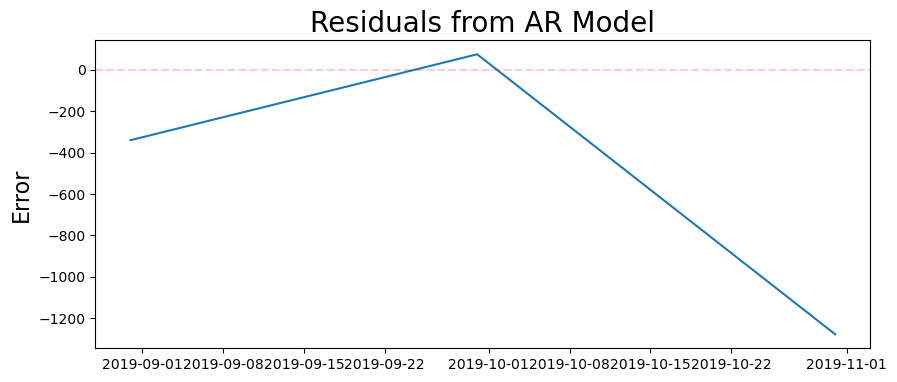

In [40]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [41]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 764.2996381110049
